In [1]:
import numpy as np
import pandas as pd
import sklearn
import math


In [2]:
df=pd.read_csv('cardio_train.csv',delimiter=';')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [5]:
df.gender.unique()

array([1, 2], dtype=int64)

In [6]:
df.shape

(69301, 13)

In [7]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df['age']=round(df['age']/365)

In [9]:
df.age

0        62.0
1        40.0
2        60.0
3        40.0
4        64.0
         ... 
69296    53.0
69297    62.0
69298    52.0
69299    61.0
69300    56.0
Name: age, Length: 69301, dtype: float64

In [10]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,62.0,1,155,69.0,130,80,2,2,0,0,1,0
1,989,40.0,1,163,71.0,110,70,1,1,0,0,1,1
2,990,60.0,1,165,70.0,120,80,1,1,0,0,1,0
3,991,40.0,2,165,85.0,120,80,1,1,1,1,1,0
4,992,64.0,1,155,62.0,120,80,1,1,0,0,1,0


In [11]:
df.shape



(69301, 13)

In [12]:
df['gender']=np.where(df.gender==1,0,1)

In [13]:
df.cardio.value_counts()

0    34679
1    34622
Name: cardio, dtype: int64

In [14]:
df.cholesterol.unique()

array([2, 1, 3], dtype=int64)

In [15]:
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003247,0.003773,-0.003735,-0.001549,0.003268,-0.002757,0.006400,0.002543,-0.003294,0.000384,0.002700,0.004269
age,0.003247,1.000000,-0.023360,-0.081233,0.054366,0.020691,0.017823,0.154297,0.098985,-0.047936,-0.029660,-0.009801,0.237709
gender,0.003773,-0.023360,1.000000,0.499373,0.155649,0.005980,0.015396,-0.036335,-0.021154,0.337608,0.171015,0.006241,0.008592
height,-0.003735,-0.081233,0.499373,1.000000,0.290333,0.005492,0.006215,-0.050632,-0.018929,0.187899,0.094164,-0.005974,-0.011015
weight,-0.001549,0.054366,0.155649,0.290333,1.000000,0.030665,0.043652,0.141901,0.107255,0.068304,0.067259,-0.016514,0.182094
ap_hi,0.003268,0.020691,0.005980,0.005492,0.030665,1.000000,0.015919,0.023573,0.011821,-0.000933,0.001385,0.000032,0.054211
ap_lo,-0.002757,0.017823,0.015396,0.006215,0.043652,0.015919,1.000000,0.024023,0.010895,0.004948,0.010764,0.004962,0.065290
cholesterol,0.006400,0.154297,-0.036335,-0.050632,0.141901,0.023573,0.024023,1.000000,0.451741,0.010237,0.036015,0.009708,0.220752
gluc,0.002543,0.098985,-0.021154,-0.018929,0.107255,0.011821,0.010895,0.451741,1.000000,-0.004608,0.011442,-0.007301,0.089062
smoke,-0.003294,-0.047936,0.337608,0.187899,0.068304,-0.000933,0.004948,0.010237,-0.004608,1.000000,0.339709,0.025794,-0.015225


In [16]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,62.0,0,155,69.0,130,80,2,2,0,0,1,0
1,989,40.0,0,163,71.0,110,70,1,1,0,0,1,1
2,990,60.0,0,165,70.0,120,80,1,1,0,0,1,0
3,991,40.0,1,165,85.0,120,80,1,1,1,1,1,0
4,992,64.0,0,155,62.0,120,80,1,1,0,0,1,0


In [17]:
df.height=df.height/100

In [18]:
df['BMI']=df['weight']/(df['height']**2)


In [19]:
df['Mean arterial pressure']=(df.ap_hi+(2*df.ap_lo))/3

In [20]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,Mean arterial pressure
0,988,62.0,0,1.55,69.0,130,80,2,2,0,0,1,0,28.720083,96.666667
1,989,40.0,0,1.63,71.0,110,70,1,1,0,0,1,1,26.722873,83.333333
2,990,60.0,0,1.65,70.0,120,80,1,1,0,0,1,0,25.711662,93.333333
3,991,40.0,1,1.65,85.0,120,80,1,1,1,1,1,0,31.221304,93.333333
4,992,64.0,0,1.55,62.0,120,80,1,1,0,0,1,0,25.806452,93.333333


In [21]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'BMI',
       'Mean arterial pressure'],
      dtype='object')

In [22]:
l=[ 'age', 'gender',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'BMI','Mean arterial pressure']
X=df[l]
y=df['cardio']

In [23]:
X

,age,gender,cholesterol,gluc,smoke,alco,active,BMI,Mean arterial pressure
0,62.0,0,2,2,0,0,1,28.720083,96.666667
1,40.0,0,1,1,0,0,1,26.722873,83.333333
2,60.0,0,1,1,0,0,1,25.711662,93.333333
3,40.0,1,1,1,1,1,1,31.221304,93.333333
4,64.0,0,1,1,0,0,1,25.806452,93.333333
...,...,...,...,...,...,...,...,...,...
69296,53.0,1,1,1,1,0,1,26.927438,93.333333
69297,62.0,0,2,2,0,0,1,50.472681,106.666667
69298,52.0,1,3,1,0,1,0,31.353579,120.000000
69299,61.0,0,1,2,0,0,0,27.099251,98.333333


In [84]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_sc=sc.fit_transform(df)


In [85]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Inertia')

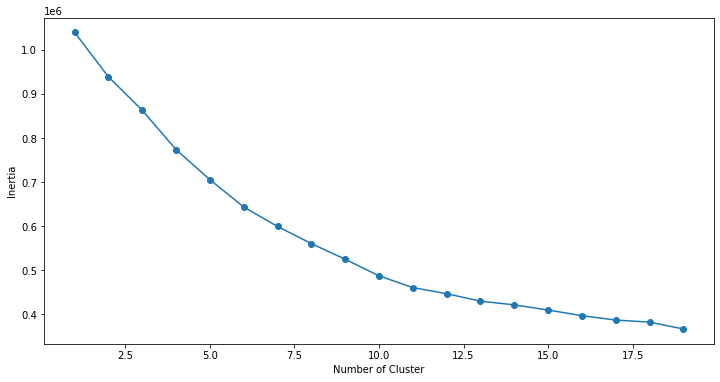

In [86]:
from sklearn.cluster import KMeans
s=[]
for i in range(1,20):
    d=KMeans(n_jobs=-1,n_clusters=i,init='k-means++').fit(X_sc)
    s.append(d.inertia_)
frame=pd.DataFrame({'Cluster':range(1,20),'S':s})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'],frame['S'],marker='o')
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia')


In [87]:
d=KMeans(n_jobs=-1,n_clusters=9,init='k-means++').fit(X_sc)
pred=d.predict(X_sc)


In [88]:
df['cluster']=pred

In [90]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,Mean arterial pressure,cluster
0,988,62.0,0,1.55,69.0,130,80,2,2,0,0,1,0,28.720083,96.666667,0
1,989,40.0,0,1.63,71.0,110,70,1,1,0,0,1,1,26.722873,83.333333,1
2,990,60.0,0,1.65,70.0,120,80,1,1,0,0,1,0,25.711662,93.333333,1
3,991,40.0,1,1.65,85.0,120,80,1,1,1,1,1,0,31.221304,93.333333,8
4,992,64.0,0,1.55,62.0,120,80,1,1,0,0,1,0,25.806452,93.333333,1


In [116]:
df.cluster.value_counts()

1    23352
Name: cluster, dtype: int64

In [91]:
df=df[df['cluster']==1]

In [92]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,Mean arterial pressure,cluster
1,989,40.0,0,1.63,71.0,110,70,1,1,0,0,1,1,26.722873,83.333333,1
2,990,60.0,0,1.65,70.0,120,80,1,1,0,0,1,0,25.711662,93.333333,1
4,992,64.0,0,1.55,62.0,120,80,1,1,0,0,1,0,25.806452,93.333333,1
5,995,58.0,0,1.64,61.0,100,70,1,1,0,0,1,0,22.679952,80.000000,1
6,996,50.0,0,1.62,72.0,100,70,1,1,0,0,1,0,27.434842,80.000000,1


In [93]:
df.shape

(23352, 16)

In [94]:
l=[ 'age', 'gender',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'BMI','Mean arterial pressure']
X=df[l]
y=df['cardio']

In [95]:
X.columns

Index(['age', 'gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active',
       'BMI', 'Mean arterial pressure'],
      dtype='object')

In [82]:
X=X[['age', 'gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active',
       'BMI', 'Mean arterial pressure']]

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import ExtraTreeClassifier,DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.preprocessing import StandardScaler



In [97]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=22)

In [98]:
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

In [99]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.7080631347118561

In [100]:
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score
accuracy_score(y_test,lr.predict(X_test))

0.6945475306879817

In [101]:
RF=RandomForestClassifier( max_depth=6)
RF.fit(X_train_sc,y_train)
RF.score(X_train_sc,y_train)

0.753334149027285

In [102]:
accuracy_score(y_test,RF.predict(X_test_sc))

0.7430773622609192

In [103]:
gb=GradientBoostingClassifier()
gb.fit(X_train_sc,y_train)
gb.score(X_train_sc,y_train)


0.7587177291080387

In [104]:
accuracy_score(y_test,gb.predict(X_test_sc))

0.7423636882671996

In [105]:
roc_auc_score(y_test,gb.predict_proba(X_test_sc)[:,1])

0.7831301003170643

In [106]:
print(classification_report(y_test,gb.predict(X_test_sc)))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81      4356
           1       0.71      0.54      0.61      2650

    accuracy                           0.74      7006
   macro avg       0.73      0.70      0.71      7006
weighted avg       0.74      0.74      0.73      7006



In [81]:
!pip install --upgrade xgboost

In [107]:
from xgboost import XGBClassifier
xg= XGBClassifier()
xg.fit(X_train_sc,y_train)
xg.score(X_train_sc,y_train)


0.7916921571026551

In [108]:
accuracy_score(y_test,xg.predict(X_test_sc))

0.7385098487011134

In [109]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train_sc,y_train)
sv.score(X_train_sc,y_train)

0.7485011623638811

In [111]:
accuracy_score(y_test,sv.predict(X_test_sc))

0.7359406223237225

In [112]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=20)
kn.fit(X_train_sc,y_train)
kn.score(X_train_sc,y_train)

0.7586565520616665

In [113]:
accuracy_score(y_test,kn.predict(X_test_sc))

0.7279474735940622

In [114]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(X_train_sc,y_train)
gb.score(X_train_sc,y_train)

0.6586932582894898

In [115]:
accuracy_score(y_test,gb.predict(X_test_sc))

0.6473023123037397